In [7]:
# EEG Preprocessing and Spectral Analysis of Motor Movement Data

# This notebook demonstrates a basic EEG analysis pipeline using open-access data from the PhysioNet EEG Motor Movement/Imagery dataset. The analysis includes data loading, preprocessing, and spectral analysis using MNE-Python.


In [8]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [9]:
print("MNE version:", mne.__version__)

MNE version: 1.11.0


In [11]:
raw = mne.io.read_raw_edf(
    r"C:\Users\andre\Downloads\eeg motor imagery\data\raw\S001R01.edf",
    preload=True
)
raw

Extracting EDF parameters from C:\Users\andre\Downloads\eeg motor imagery\data\raw\S001R01.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MiB, data loaded>

In [12]:
print("Sampling frequency:", raw.info["sfreq"])
print("Number of channels:", raw.info["nchan"])
print("Channel names:", raw.info["ch_names"][:10])

Sampling frequency: 160.0
Number of channels: 64
Channel names: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..']


In [18]:
channel_names = raw.info['ch_names']

rename_dict = {}
for ch_name in channel_names:
    if ch_name in ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']:
        # Remove dots and format to match standard_1020 naming convention
        # For standard_1020, channels like 'FC5' (not 'fc5') are used
        standard_name = ch_name.replace('.', '')
        rename_dict[ch_name] = standard_name


raw.rename_channels(rename_dict)

print("Available montages:", mne.channels.get_builtin_montages())

montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, on_missing='ignore') 

Available montages: ['standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', 'standard_primed', 'biosemi16', 'biosemi32', 'biosemi64', 'biosemi128', 'biosemi160', 'biosemi256', 'easycap-M1', 'easycap-M10', 'easycap-M43', 'EGI_256', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'mgh60', 'mgh70', 'artinis-octamon', 'artinis-brite23', 'brainproducts-RNP-BA-128']


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MiB, data loaded>

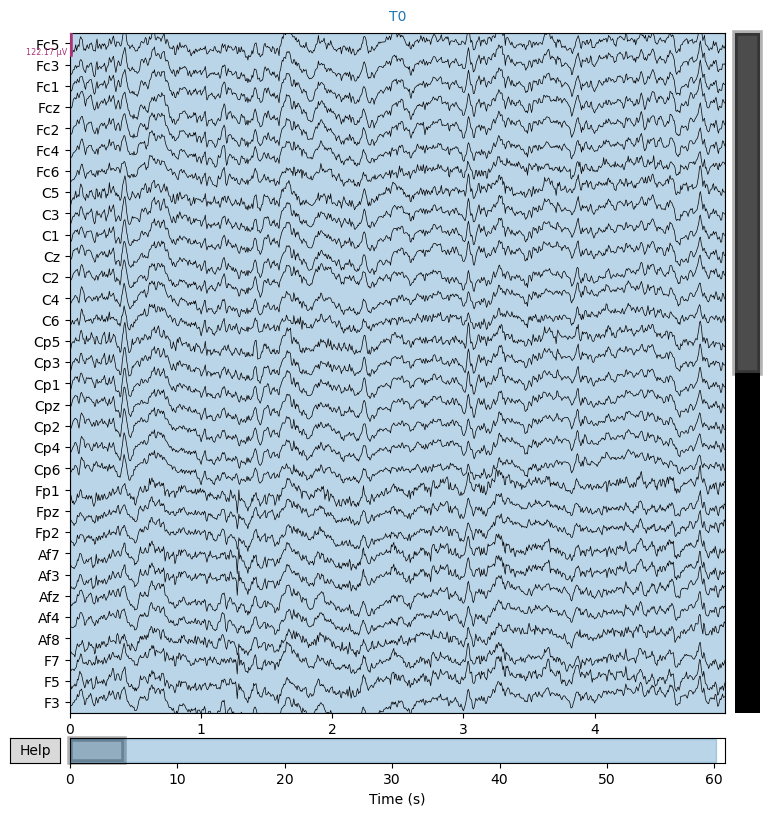

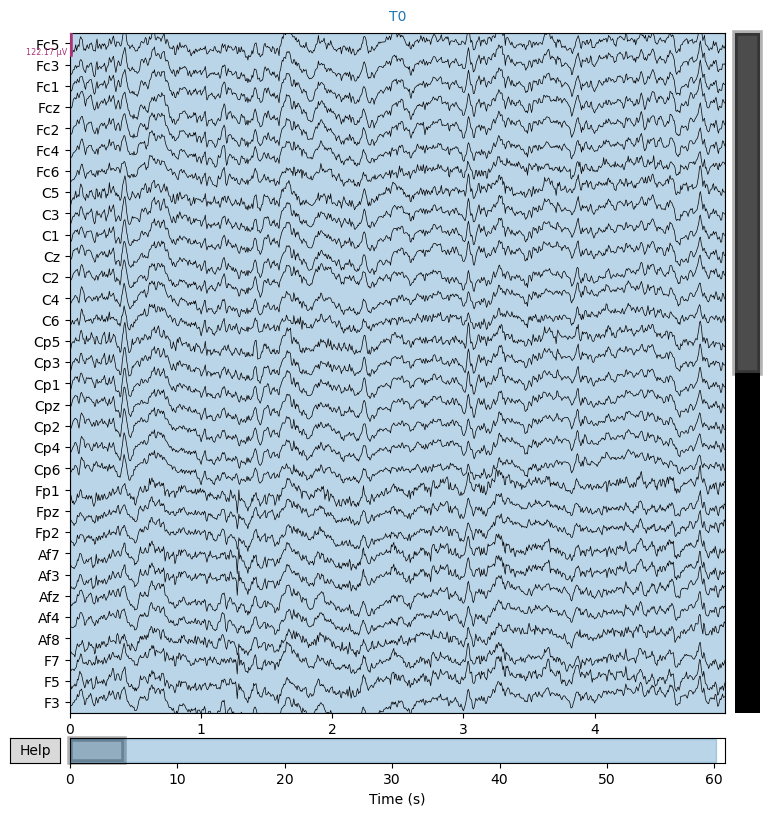

In [19]:
raw.plot(
    n_channels=32,
    duration=5,
    scalings="auto",
    title="Raw EEG Signal (Motor Movement Task)"
)

In [20]:
raw_filtered = raw.copy().filter(
    l_freq=1.0,
    h_freq=40.0,
    fir_design="firwin"
)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\andre\anaconda3\Lib\site-packages\mne\viz\utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


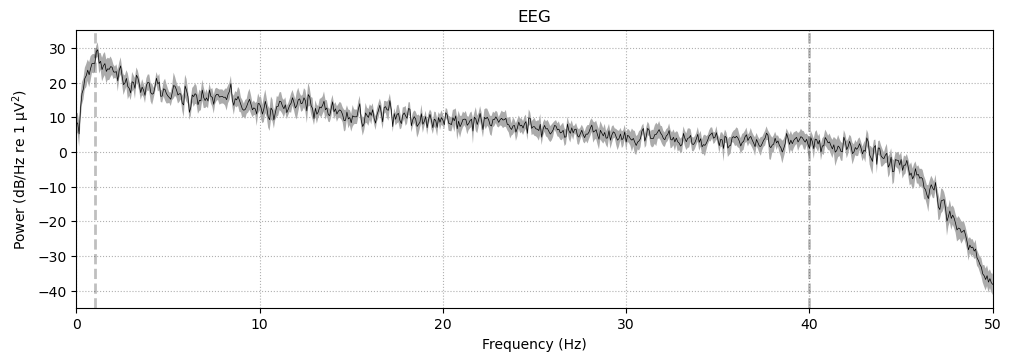

In [21]:
raw_filtered.plot_psd(
    fmax=50,
    average=True,
    spatial_colors=False
)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\andre\anaconda3\Lib\site-packages\mne\viz\utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


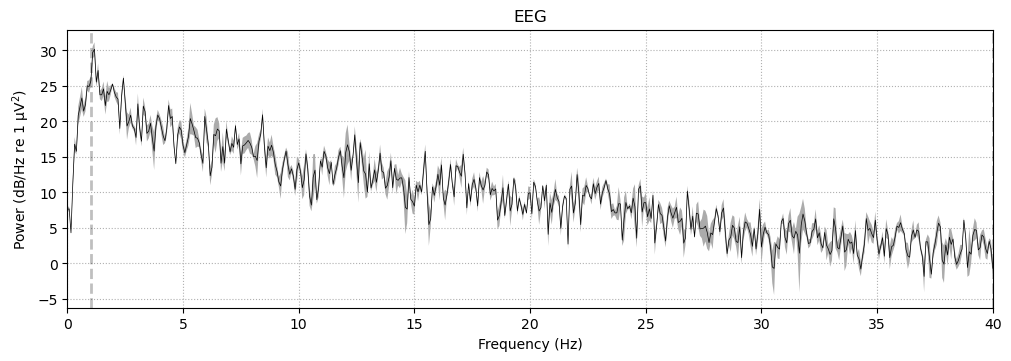

In [35]:
motor_channels = ["C3", "Cz", "C4"]

raw_filtered.plot_psd(
    picks=motor_channels,
    fmax=40,
    average=True,
    spatial_colors=False
)

In [29]:

psd = raw_filtered.compute_psd(
    fmin=8,
    fmax=30,
    n_fft=2048
)


psds = psd.get_data()  
freqs = psd.freqs       


mu_band = (freqs >= 8) & (freqs <= 13)
beta_band = (freqs >= 13) & (freqs <= 30)

mu_power = psds[:, mu_band].mean(axis=1)
beta_power = psds[:, beta_band].mean(axis=1)



Effective window size : 12.800 (s)


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


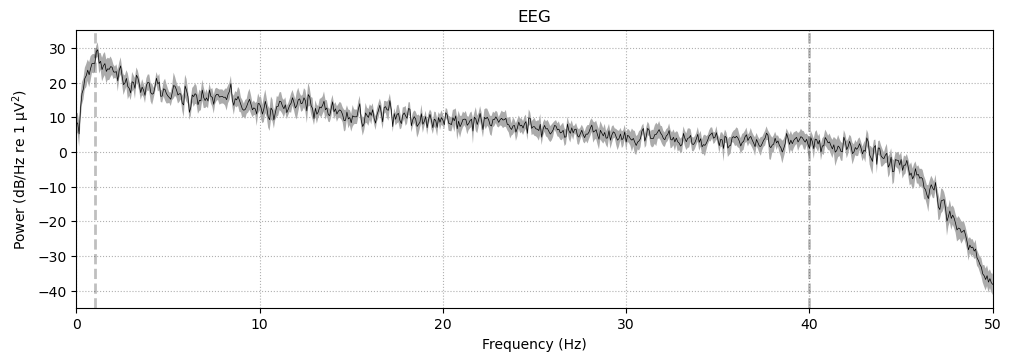

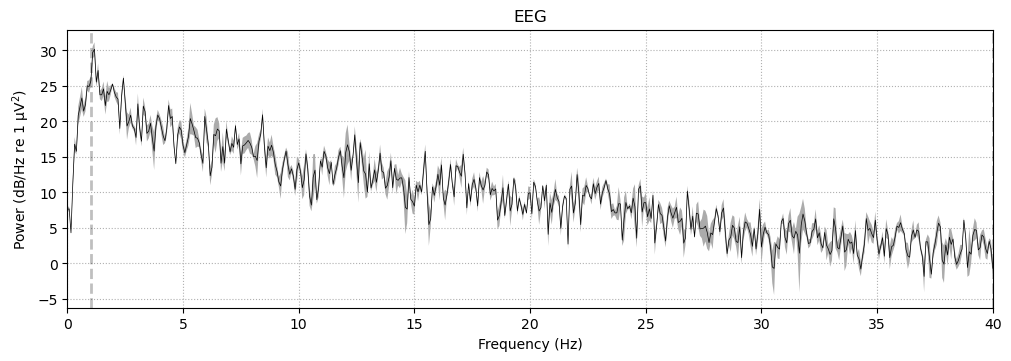

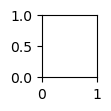

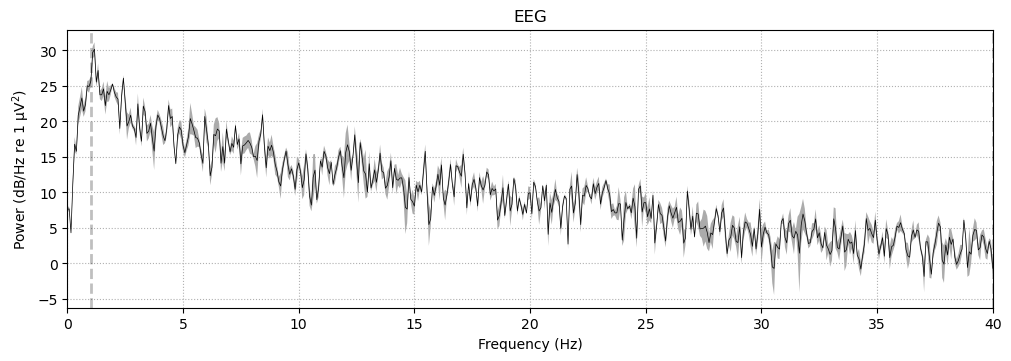

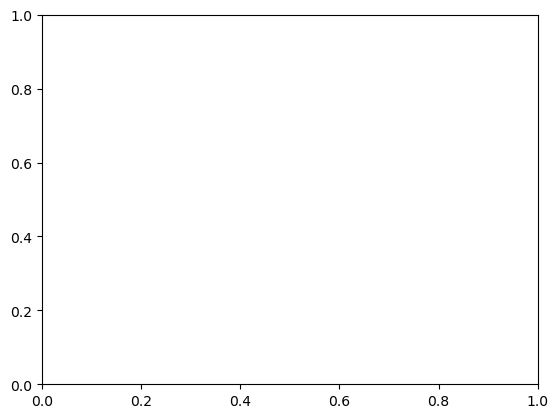

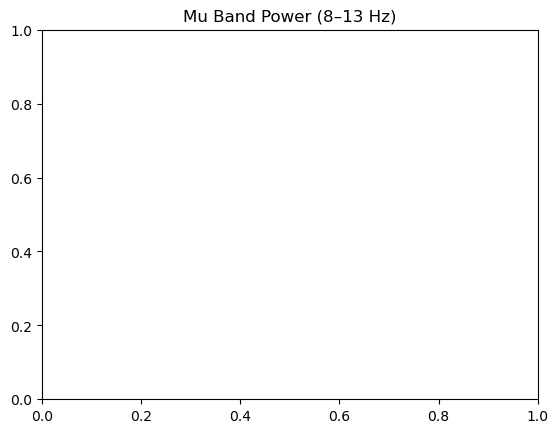

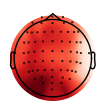

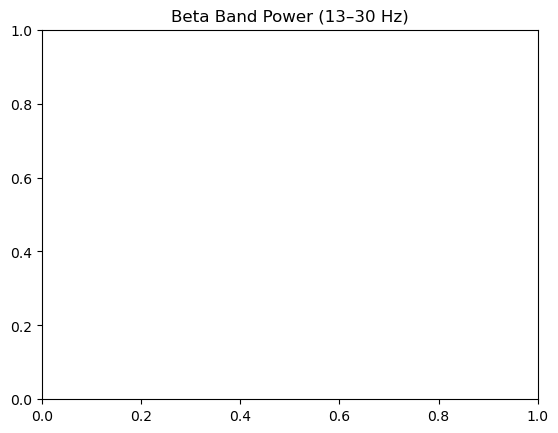

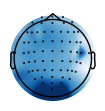

In [42]:
import matplotlib.pyplot as plt
from mne.viz import plot_topomap


raw_eeg = raw_filtered.copy().pick_types(eeg=True)


montage = mne.channels.make_standard_montage("standard_1020")
raw_eeg.set_montage(montage, match_case=False)


eeg_indices = [raw_filtered.ch_names.index(ch) for ch in raw_eeg.ch_names]


mu_power_eeg = mu_power[eeg_indices]
beta_power_eeg = beta_power[eeg_indices]


fig, ax = plt.subplots()
plot_topomap(
    mu_power_eeg,
    pos=raw_eeg.info,
    contours=0,
    cmap="Reds",
    show=False
)
ax.set_title("Mu Band Power (8–13 Hz)")
plt.show()


fig, ax = plt.subplots()
plot_topomap(
    beta_power_eeg,
    pos=raw_eeg.info,
    contours=0,
    cmap="Blues",
    show=False
)
ax.set_title("Beta Band Power (13–30 Hz)")
plt.show()

In [47]:
import os

os.makedirs("../figures", exist_ok=True)

plt.savefig("../figures/mu_beta_topography.png", dpi=300)


In [ ]:
## Discussion

#This analysis demonstrates a basic EEG preprocessing and spectral analysis pipeline using motor movement data. Power spectral density analysis revealedexpected activity in the mu (8–13 Hz) and beta (13–30 Hz) frequency bands, particularly over central electrodes associated with motor cortex activity.